In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
%matplotlib inline

In [2]:
from pathlib import Path
output_dir = Path('../output/1231_154417/')
oof0 = pd.read_csv(output_dir / 'oof_fold0.csv')
oof1 = pd.read_csv(output_dir / 'oof_fold1.csv')
oof2 = pd.read_csv(output_dir / 'oof_fold2.csv')
oof3 = pd.read_csv(output_dir / 'oof_fold3.csv')
oof4 = pd.read_csv(output_dir / 'oof_fold4.csv')
oof0.head()

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max,data_type,rank_0,rank_1,...,rank_16,rank_17,rank_18,rank_19,rank_20,rank_21,rank_22,rank_23,ranking,top_id
0,007f87ba2,12,1,39.1360,562.50,42.2720,3281.25,tp,4,12,...,9,17,19,20,7,2,15,22,1,7
1,0151b7d20,1,1,46.0320,3843.75,46.9280,5625.00,tp,1,3,...,10,7,8,4,18,20,22,21,0,8
2,02b9a8ab9,12,1,33.9093,562.50,37.0453,3281.25,tp,12,18,...,22,7,10,19,2,17,11,15,0,5
3,04975ecd8,19,1,54.3840,281.25,55.9360,2812.50,tp,19,7,...,4,21,1,18,22,12,0,9,0,22
4,053aeb7bd,23,4,0.9520,6459.96,8.8758,11627.90,tp,23,14,...,6,17,2,19,16,20,15,22,0,3


In [4]:
oof0['fold'] = 0
oof1['fold'] = 1
oof2['fold'] = 2
oof3['fold'] = 3
oof4['fold'] = 4

In [33]:
oof = pd.concat([oof0, oof1, oof2, oof3]).reset_index(drop=True)
oof

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max,data_type,rank_0,rank_1,...,rank_17,rank_18,rank_19,rank_20,rank_21,rank_22,rank_23,ranking,top_id,fold
0,007f87ba2,12,1,39.1360,562.50,42.2720,3281.25,tp,4,12,...,17,19,20,7,2,15,22,1,7,0
1,0151b7d20,1,1,46.0320,3843.75,46.9280,5625.00,tp,1,3,...,7,8,4,18,20,22,21,0,8,0
2,02b9a8ab9,12,1,33.9093,562.50,37.0453,3281.25,tp,12,18,...,7,10,19,2,17,11,15,0,5,0
3,04975ecd8,19,1,54.3840,281.25,55.9360,2812.50,tp,19,7,...,21,1,18,22,12,0,9,0,22,0
4,053aeb7bd,23,4,0.9520,6459.96,8.8758,11627.90,tp,23,14,...,17,2,19,16,20,15,22,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,fb02b0607,21,1,36.4427,3281.25,37.5360,4125.00,tp,4,18,...,7,19,15,2,11,6,16,2,3,3
972,fb5371e7b,23,1,50.1667,7235.16,56.2503,11283.40,tp,23,4,...,14,17,2,0,5,16,19,0,20,3
973,fba69b00a,21,1,36.5653,3281.25,37.6587,4125.00,tp,8,12,...,17,15,7,11,10,19,20,2,8,3
974,fdda158ed,12,1,42.8480,562.50,45.9840,3281.25,tp,12,8,...,16,15,11,7,10,20,19,0,6,3


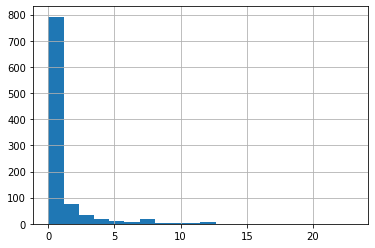

In [34]:
oof['ranking'].hist(bins=20)


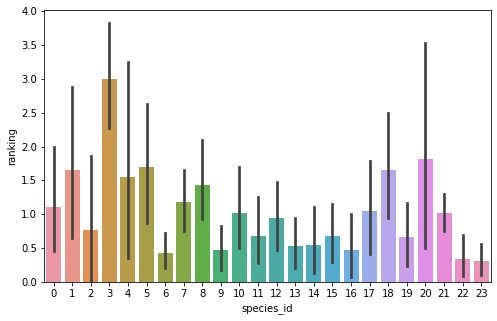

In [35]:
fig = plt.figure(figsize=(8, 5))
sns.barplot(x='species_id', y='ranking', data=oof)

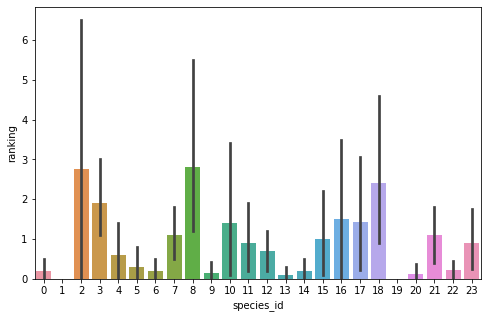

In [36]:
fig = plt.figure(figsize=(8, 5))
sns.barplot(x='species_id', y='ranking', data=oof[oof['fold']==0])

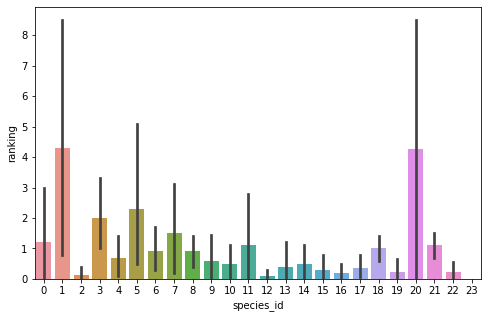

In [37]:
fig = plt.figure(figsize=(8, 5))
sns.barplot(x='species_id', y='ranking', data=oof[oof['fold']==1])

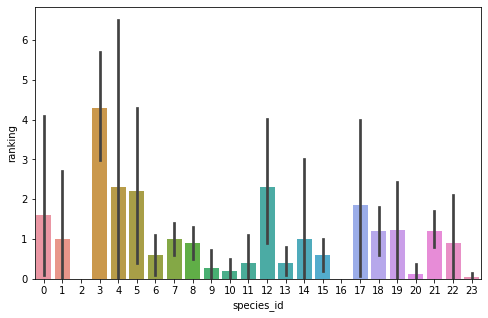

In [38]:
fig = plt.figure(figsize=(8, 5))
sns.barplot(x='species_id', y='ranking', data=oof[oof['fold']==2])

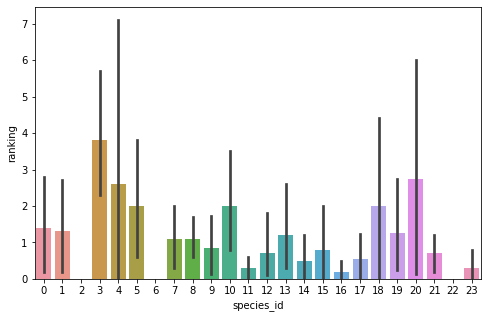

In [39]:
fig = plt.figure(figsize=(8, 5))
sns.barplot(x='species_id', y='ranking', data=oof[oof['fold']==3])

In [41]:
# fig = plt.figure(figsize=(8, 5))
# sns.barplot(x='species_id', y='ranking', data=oof[oof['fold']==4])

In [42]:
thr_rank = 4
rank_columns = [f'rank_{i}' for i in range(24)]
bad_result = oof[oof['ranking'] >= thr_rank].copy()
bad_result = bad_result.drop(rank_columns, axis=1).reset_index(drop=True)
good_result = oof[oof['ranking'] < thr_rank].copy()
good_result = good_result.drop(rank_columns, axis=1).reset_index(drop=True)
bad_result

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max,data_type,ranking,top_id,fold
0,055d22517,10,1,47.5835,947.461,50.0274,10852.70,tp,10,15,0
1,178b835e3,16,4,21.2267,3093.750,23.0613,4593.75,tp,7,16,0
2,178b835e3,16,4,4.2560,3093.750,6.0907,4593.75,tp,7,16,0
3,27c146a88,17,4,26.7733,1312.500,29.3067,7406.25,tp,9,20,0
4,2ffaa6c02,15,1,53.3173,93.750,56.6613,1125.00,tp,4,19,0
...,...,...,...,...,...,...,...,...,...,...,...
71,cf44264e5,20,1,50.4587,2343.750,53.8987,5718.75,tp,9,11,3
72,cf867adcc,3,1,11.7173,1031.250,12.4587,2812.50,tp,6,9,3
73,d9bfc9e6b,0,1,56.8160,5906.250,57.6107,8250.00,tp,7,7,3
74,dfa6a4a64,10,1,9.8162,947.461,12.2601,10852.70,tp,4,17,3


In [43]:
oof['songtype_id'].value_counts()

1    870
4    106
Name: songtype_id, dtype: int64

In [44]:
bad_result['songtype_id'].value_counts()

1    70
4     6
Name: songtype_id, dtype: int64

Text(0.5, 1.0, 'num audio on bad result( thr = 4)')

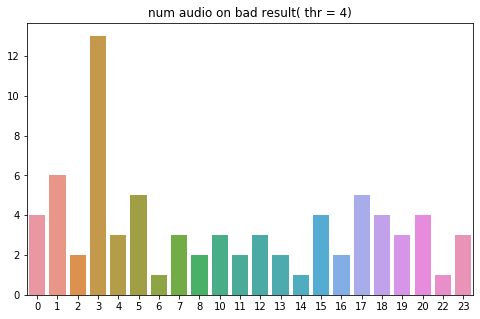

In [45]:
y = bad_result['species_id'].value_counts().values
x = bad_result['species_id'].value_counts().index
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()
sns.barplot(x,y)
ax.set_title(f'num audio on bad result( thr = {thr_rank})')


間違いは３がダントツで多い

Text(0.5, 1.0, 'num audio on good result( thr = 4)')

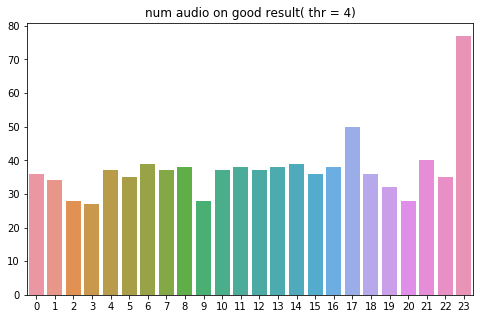

In [46]:
y = good_result['species_id'].value_counts().values
x = good_result['species_id'].value_counts().index
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()
sns.barplot(x,y)
ax.set_title(f'num audio on good result( thr = {thr_rank})')

Text(0.5, 1.0, 'predicted target ranking results on good result ( thr = 4 )')

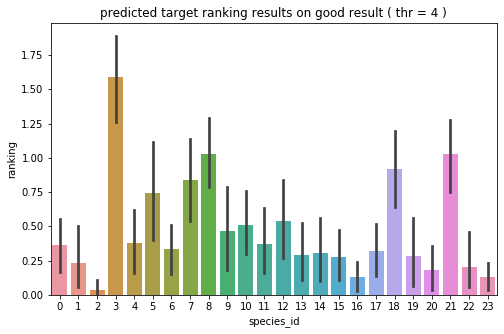

In [50]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()
sns.barplot(x='species_id', y='ranking', data=good_result)
ax.set_title(f'predicted target ranking results on good result ( thr = {thr_rank} )')

Text(0.5, 1.0, 'predicted target ranking results on bad result ( thr = 4 )')

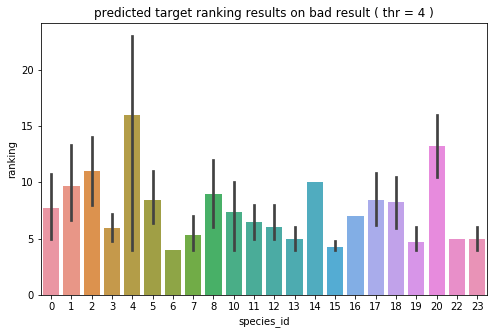

In [51]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()
sns.barplot(x='species_id', y='ranking', data=bad_result)
ax.set_title(f'predicted target ranking results on bad result ( thr = {thr_rank} )')

In [ ]:
予測のranking結果は

## bad_resultの音声を可視化してみる

In [19]:
import librosa
import librosa.display

import soundfile as sf
from IPython.display import Audio

In [54]:
ext_bad_result = bad_result[bad_result['ranking'] > 10].copy()
ext_bad_result

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max,data_type,ranking,top_id,fold
11,b12e80061,2,1,18.8480,468.75,20.6240,3000.00,tp,14,9,0
12,b9f3581d5,18,1,58.5333,3187.50,59.2267,5062.50,tp,11,2,0
17,fd6a520d8,8,1,6.8213,3750.00,10.9440,5531.25,tp,12,4,0
19,178b835e3,20,1,36.6453,2343.75,40.0853,5718.75,tp,17,21,1
25,5f9b4785b,1,1,47.9947,3843.75,48.8907,5625.00,tp,18,20,1
26,670a35128,20,1,43.8613,2343.75,47.3013,5718.75,tp,15,22,1
29,b4110d8aa,1,1,30.3360,3843.75,31.2320,5625.00,tp,12,8,1
32,ffb8d8391,5,1,14.3467,4781.25,16.6987,10406.20,tp,13,0,1
44,9c8947073,0,1,25.7653,5906.25,27.0560,7500.00,tp,12,12,2
46,d169ed0b5,17,4,18.4427,1312.50,20.9760,7406.25,tp,12,23,2


In [55]:
audio_path = Path('../input/rfcx-species-audio-detection/train')

e42215aa0


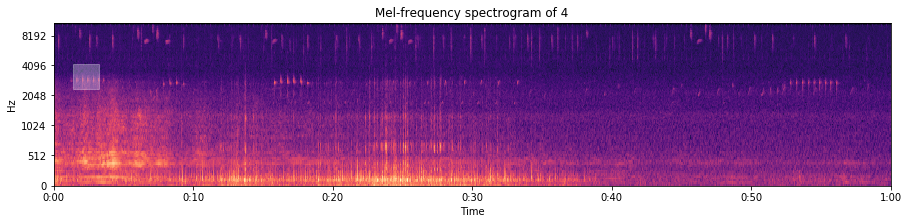

In [67]:
sample = ext_bad_result.sample(1)
species_id = sample['species_id'].values[0]
recording_id = sample['recording_id'].values[0]
print(recording_id)
y, sr = librosa.load(audio_path / f'{recording_id}.flac')
melspec = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
melspec = librosa.power_to_db(melspec).astype(np.float32)
fig, ax = plt.subplots(figsize=(15,3))
librosa.display.specshow(melspec, sr=sr, x_axis="time", y_axis="mel")
ax.set(title=f'Mel-frequency spectrogram of {species_id}')
t_min = sample['t_min'].values[0]
t_max = sample['t_max'].values[0]
f_min = sample['f_min'].values[0]
f_max = sample['f_max'].values[0]
ax.add_patch(patches.Rectangle(xy=(t_min, f_min), width=t_max-t_min, height=f_max-f_min, color='white', fill=True, alpha=0.3))
# Audio(y, rate=sr)

In [ ]:
sample = ext_bad_result.sample(1)
species_id = sample['species_id'].values[0]
recording_id = sample['recording_id'].values[0]
print(recording_id)
y, sr = librosa.load(audio_path / f'{recording_id}.flac')
melspec = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
melspec = librosa.power_to_db(melspec).astype(np.float32)
fig, ax = plt.subplots(figsize=(15,3))
librosa.display.specshow(melspec, sr=sr, x_axis="time", y_axis="mel")
ax.set(title=f'Mel-frequency spectrogram of {species_id}')
t_min = sample['t_min'].values[0]
t_max = sample['t_max'].values[0]
f_min = sample['f_min'].values[0]
f_max = sample['f_max'].values[0]
ax.add_patch(patches.Rectangle(xy=(t_min, f_min), width=t_max-t_min, height=f_max-f_min, color='white', fill=True, alpha=0.3))
# Audio(y, rate=sr)